<a href="https://colab.research.google.com/github/buildwithdemis/machinelearning/blob/main/Capstone_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Download latest version
import pandas

!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/buildwithdemis/machinelearning/refs/heads/main/All_Attacks.csv

# Read the text file containing data using pandas
dataset = pandas.read_csv('All_Attacks.csv', delimiter=';')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head(10)

--2025-06-03 22:12:07--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py.4’

graphing.py.4       100%[===================>]  21.01K  --.-KB/s    in 0.002s  

2025-06-03 22:12:07 (9.73 MB/s) - ‘graphing.py.4’ saved [21511/21511]

--2025-06-03 22:12:08--  https://raw.githubusercontent.com/buildwithdemis/machinelearning/refs/heads/main/All_Attacks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response.

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
0,61.0,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,1
1,61.0,4,32,1,0.500000,1.000000,0.986111,1.000000,1.419998,37,0.500000,1.000000,0,0,0,1,1
2,62.0,24,16,2,0.666667,0.666667,0.751425,0.751425,0.008049,187,0.785714,0.785714,0,0,2,0,1
3,62.0,16,24,1,0.333333,0.333333,0.248576,0.248576,0.002663,51,0.214286,0.214286,0,0,0,1,1
4,63.0,16,24,1,1.000000,1.000000,1.000000,1.000000,0.002953,60,1.000000,1.000000,0,0,0,2,1
5,65.0,3,32,1,0.500000,0.500000,0.987151,0.987151,0.330002,37,0.266187,0.266187,0,0,0,1,1
6,65.0,36,35,1,0.500000,0.500000,0.012849,0.012849,0.004295,102,0.733813,0.733813,1,0,0,0,1
7,66.0,34,49,1,0.333333,1.000000,0.000000,1.000000,0.000000,26,0.175676,1.000000,0,1,0,1,1
8,66.0,39,49,1,0.333333,1.000000,0.333331,1.000000,0.309998,26,0.175676,1.000000,0,1,0,1,1
9,66.0,41,49,1,0.333333,1.000000,0.666669,1.000000,0.620003,96,0.648649,1.000000,1,0,0,0,1


In [13]:
# prompt: Using dataframe dataset: display information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second               10845 non-null  float64
 1   src                  10845 non-null  int64  
 2   dst                  10845 non-null  int64  
 3   packetcount          10845 non-null  int64  
 4   src_ratio            10845 non-null  float64
 5   dst_ratio            10845 non-null  float64
 6   src_duration_ratio   10845 non-null  float64
 7   dst_duration_ratio   10845 non-null  float64
 8   TotalPacketDuration  10845 non-null  float64
 9   TotalPacketLenght    10845 non-null  int64  
 10  src_packet_ratio     10845 non-null  float64
 11  dst_packet_ratio     10845 non-null  float64
 12  DioCount             10845 non-null  int64  
 13  DisCount             10845 non-null  int64  
 14  DaoCount             10845 non-null  int64  
 15  OtherMsg             10845 non-null 

# Description of each column

**second** Simulation time in seconds when the packet or event was recorded. Useful for time-series or temporal pattern detection.

**src** Source node ID that sent the packet. Helps identify who initiated communication.

**dst** Destination node ID that received the packet. Together with src, this helps model communication patterns.

**packetcount** Number of packets exchanged in the given communication (or in the session/interval). Higher values might indicate abnormal activity like flooding.

**src_ratio** Proportion of total communication initiated by the source node (e.g., packets sent by src / total packets in session). Can reveal if a node is overly active.

**dst_ratio** Similar to src_ratio but for the destination node. Might be useful to detect unusual traffic received.

**src_duration_ratio** Proportion of time the source was involved in the communication compared to a time window/session. Possibly: src_duration / total_duration.

**dst_duration_ratio** Same as above but for destination node. Helps determine sustained targeting or behavior over time.

**TotalPacketDuration** Total time between first and last packet of the communication. Can help detect persistent vs. bursty traffic.

**TotalPacketLenght** Cumulative size of packets exchanged in bytes. Unusually high totals may suggest data exfiltration or flooding. (Note: “Lenght” is a typo — should be “Length”)

**src_packet_ratio** Ratio of packets sent by source node relative to total number of packets in the conversation/session.

**dst_packet_ratio** Ratio of packets received by destination node relative to total. A skewed value may suggest asymmetric behavior.

**DioCount** Number of DIO (DODAG Information Object) control messages sent — part of RPL (Routing Protocol for Low-Power and Lossy Networks). Could be used to detect routing manipulation or control-plane abuse.

**DisCount** Number of DIS (DODAG Information Solicitation) messages — used to request network topology info.

**DaoCount** Number of DAO (Destination Advertisement Object) messages — used to advertise destination routes.

**OtherMsg** Count of other message types not classified as DIO/DIS/DAO — possibly includes application or attack-specific traffic.

**label** Target variable. Most likely 1 for attack/malicious activity, and 0 for normal/benign behavior. Or multi-class if it includes different attack types.


# Data Exploration

The **label** field is our target. A value of 1 means that an attack/malicious activity did occur at the conditions described by the features, whereas a value of 0 means no attack/malicious activity happened. Because our targets can only be 0 or 1, we call this a binary classification model.

Now, let's plot the relationships between each feature and the target values. That helps us understand which features are more likely to influence the results:

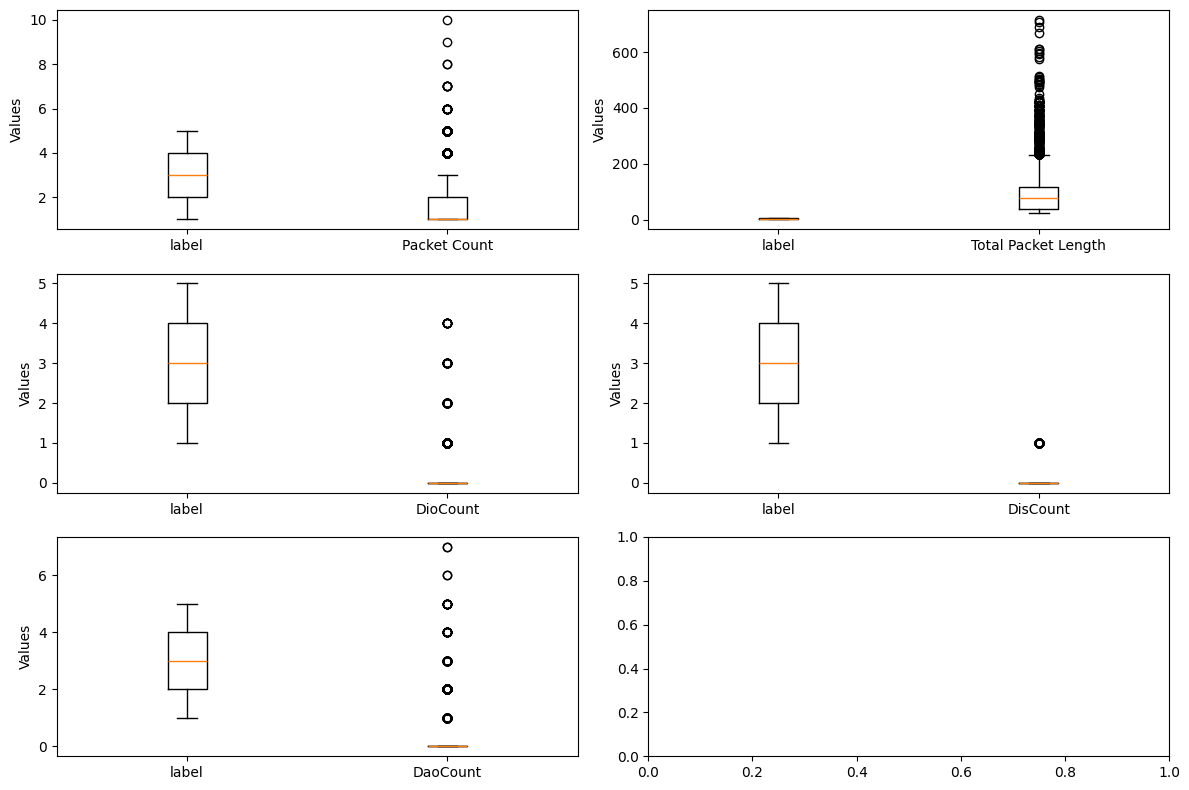

In [21]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(3, 2,figsize=(12, 8))

# Create box plots
axs[0, 0].boxplot([dataset["label"], dataset["packetcount"]])
axs[0, 0].set_xticklabels(['label', 'Packet Count'])
axs[0, 0].set_ylabel('Values')

axs[0, 1].boxplot([dataset["label"], dataset["TotalPacketLenght"]])
axs[0, 1].set_xticklabels(['label', 'Total Packet Length'])
axs[0, 1].set_ylabel('Values')

axs[1, 0].boxplot([dataset["label"], dataset["DioCount"]])
axs[1, 0].set_xticklabels(['label', 'DioCount'])
axs[1, 0].set_ylabel('Values')

axs[1, 1].boxplot([dataset["label"], dataset["DisCount"]])
axs[1, 1].set_xticklabels(['label', 'DisCount'])
axs[1, 1].set_ylabel('Values')

axs[2, 0].boxplot([dataset["label"], dataset["DaoCount"]])
axs[2, 0].set_xticklabels(['label', 'DaoCount'])
axs[2, 0].set_ylabel('Values')

plt.tight_layout()

plt.show()

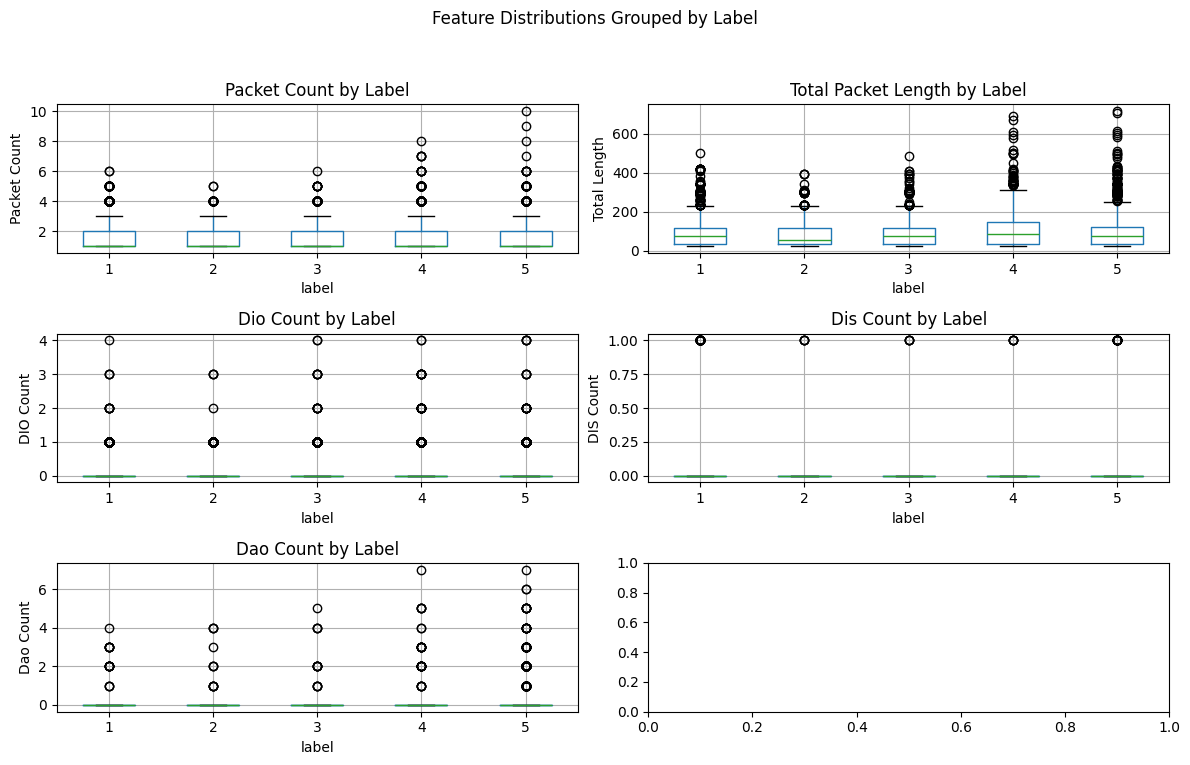

In [25]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# Boxplots of features grouped by label
dataset.boxplot(column='packetcount', by='label', ax=axs[0, 0])
axs[0, 0].set_title('Packet Count by Label')
axs[0, 0].set_ylabel('Packet Count')

dataset.boxplot(column='TotalPacketLenght', by='label', ax=axs[0, 1])
axs[0, 1].set_title('Total Packet Length by Label')
axs[0, 1].set_ylabel('Total Length')

dataset.boxplot(column='DioCount', by='label', ax=axs[1, 0])
axs[1, 0].set_title('Dio Count by Label')
axs[1, 0].set_ylabel('DIO Count')

dataset.boxplot(column='DisCount', by='label', ax=axs[1, 1])
axs[1, 1].set_title('Dis Count by Label')
axs[1, 1].set_ylabel('DIS Count')

dataset.boxplot(column='DaoCount', by='label', ax=axs[2, 0])
axs[2, 0].set_title('Dao Count by Label')
axs[2, 0].set_ylabel('Dao Count')

# Adjust layout
plt.suptitle('Feature Distributions Grouped by Label')  # Set overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
plt.show()

We observed that the features

*   packetcount,
*   DaoCount, and
*   TotalPacketLenght

show a positive correlation with the label. As the values of these features increase, the likelihood of the instance being classified as an attack (label = 1) also tends to increase.

# Building a simple logistic regression model

We will now build and train a model to predict the chance of an avalanche happening based solely on the number of weak layers of snow:

In [26]:
# Here we import a function that splits datasets according to a given ratio
from sklearn.model_selection import train_test_split

# Split the dataset in an 70/30 train/test ratio.
train, test = train_test_split(dataset, test_size=0.3, random_state=2)
print(train.shape)
print(test.shape)

(7591, 17)
(3254, 17)


OK, lets train our model, using the train dataset we've just created (notice that packetcount, DaoCount, and TotalPacketLenght will be the features used to determine the outcome)

In [30]:
print(train['label'].unique())

[5 3 2 4 1]
